In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot


#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)



import datetime as dt
from matplotlib import style
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score


import math

from sklearn import svm


import sklearn.metrics as metrics

In [3]:
bank_full = pd.read_csv('C:\Users\PC-ASUS\Downloads\bank-full.csv')
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_full.replace({"poutcome":{'unknown':0,'failure':1,'other':2,'success':3}},inplace = True)

In [5]:
bank_full.replace({"y":{'no':0,'yes':1}},inplace = True)

In [6]:
bank_full.replace({"contact":{'cellular':0,'unknown':1,'telephone':2}},inplace = True)

In [7]:
bank_full.replace({"loan":{'no':0,'yes':1}},inplace = True)

In [8]:
bank_full.replace({"housing":{'no':0,'yes':1}},inplace = True)

In [9]:
bank_full.replace({"education":{'unknown':0,'primary':1,'secondary':2,'tertiary':3}},inplace = True)

In [10]:
bank_full.replace({"marital":{'married':0,'single':1,'divorced':2}},inplace = True)

In [11]:
bank_full.replace({"job":{'unknown':0,'student':1,'unemployed':2,'housemaid':3,'retired':4,'blue-collar':5,'technician':6,'services':7,'self-employed':8,'entrepreneur':9,'management':10,'admin.':11}},inplace = True)

In [12]:
bank_full.replace({"default":{'no':0,'yes':1}},inplace = True)

In [13]:
bank_full.drop(['month','day'],axis=1,inplace=True)

In [14]:
x = bank_full.drop(columns =['loan'],axis=1)
y = bank_full['loan']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,stratify=y,random_state=2)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

In [17]:
print(accuracy_score(dtree_predictions,y_test))

0.8396727111897391


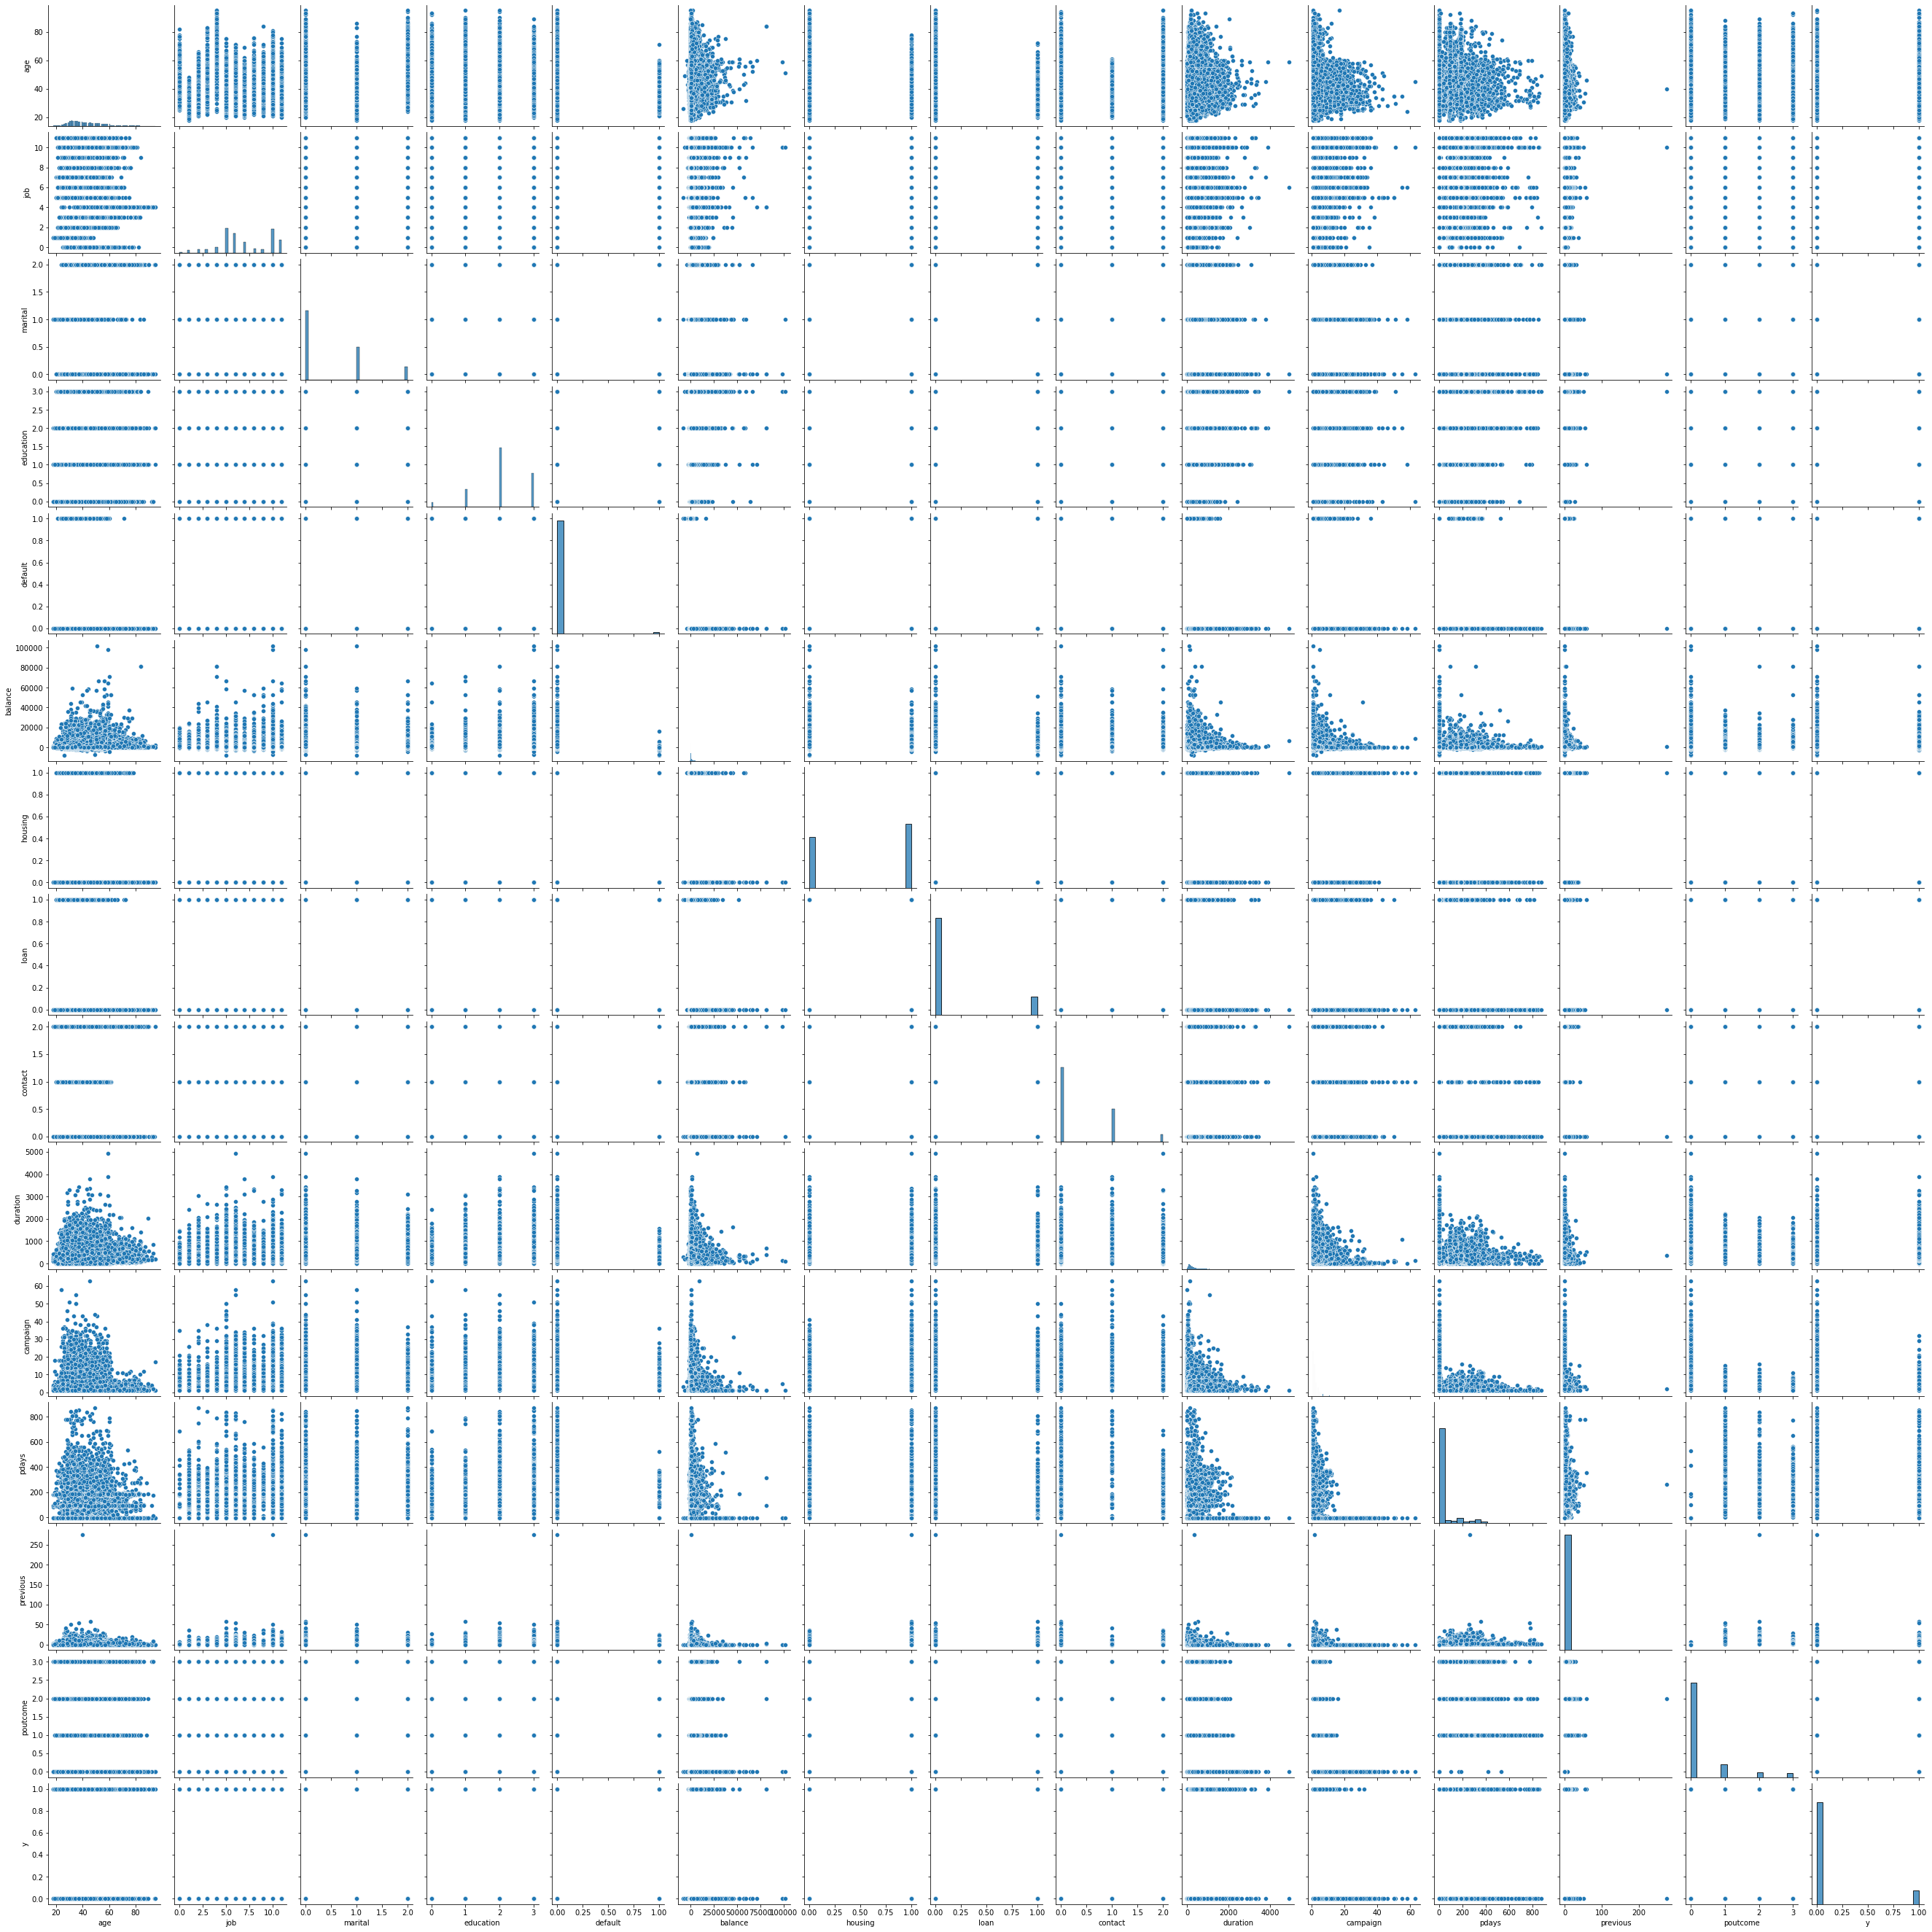

In [18]:
sns.pairplot(bank_full)

In [29]:
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)

In [30]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [31]:
clf_predictions = clf.predict(x_test)

In [32]:
clf_cm = confusion_matrix(y_test, clf_predictions)

In [33]:
print(accuracy_score(clf_predictions,y_test))

0.8387881468376824


In [34]:
import xgboost as xgb

In [35]:
xgb_model = xgb.XGBClassifier()


In [36]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [37]:
xgb_predictions = xgb_model.predict(x_test)

In [38]:
xgb_cm = confusion_matrix(y_test, xgb_predictions)

In [39]:
print(accuracy_score(xgb_predictions,y_test))

0.8383458646616542


In [40]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   duration   45211 non-null  int64
 10  campaign   45211 non-null  int64
 11  pdays      45211 non-null  int64
 12  previous   45211 non-null  int64
 13  poutcome   45211 non-null  int64
 14  y          45211 non-null  int64
dtypes: int64(15)
memory usage: 5.2 MB


In [41]:
bank_full.describe()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,7.014134,0.513238,2.060516,0.018027,1362.272058,0.555838,0.160226,0.416536,258.163080,2.763841,40.197828,0.580323,0.290062,0.116985
std,10.618762,2.752699,0.692948,0.778704,0.133049,3044.765829,0.496878,0.366820,0.609586,257.527812,3.098021,100.128746,2.303441,0.698469,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,5.000000,0.000000,2.000000,0.000000,72.000000,0.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,6.000000,0.000000,2.000000,0.000000,448.000000,1.000000,0.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,10.000000,1.000000,3.000000,0.000000,1428.000000,1.000000,0.000000,1.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000
